In [56]:
import os
import requests
import pandas as pd
import numpy as np

# URL and API Key of Alpha Vantage
url = 'https://www.alphavantage.co/query?'

api_key = os.getenv('ALPHA_VANTAGE_API_KEY')

params = {
    'function': 'TIME_SERIES_DAILY_ADJUSTED',
    'symbol': 'TSLA',
    'outputsize': 'full',
    'datatype': 'csv'
}

headers = {"accept": "application/JSON"}
headers['Authorization'] = api_key

In [57]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=WHEAT&apikey=UL5CJJGFRPG14MGK&datatype=csv&outputsize=full&interval=monthly'

payload = {}
headers = {
  'ALPHA_VANTAGE_API_KEY': 'UL5CJJGFRPG14MGK'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

timestamp,value
2023-07-01,278.617600992064
2023-06-01,282.27674528254
2023-05-01,299.44000625
2023-04-01,312.81082437193
2023-03-01,309.429599855072
2023-02-01,332.412023436842
2023-01-01,320.097045125
2022-12-01,323.654838134921
2022-11-01,344.329860728333
2022-10-01,353.712907166667
2022-09-01,346.322181071428
2022-08-01,323.016768768116
2022-07-01,321.97512765873
2022-06-01,397.6523199
2022-05-01,444.15656781746
2022-04-01,406.026886301667
2022-03-01,387.665013697101
2022-02-01,347.5032275
2022-01-01,326.081669833333
2021-12-01,324.017900555555
2021-11-01,317.437354813333
2021-10-01,294.036818253968
2021-09-01,269.733507301587
2021-08-01,274.87603
2021-07-01,243.628006984127
2021-06-01,238.767026666667
2021-05-01,278.447005396825
2021-04-01,239.936143333333
2021-03-01,229.887549275362
2021-02-01,240.806388070175
2021-01-01,237.944249824561
2020-12-01,217.312542857143
2020-11-01,210.753936491228
2020-10-01,203.4263
2020-09-01,204.137313809524
2020-08-01,174.182476984127
2020-07-01,1

In [58]:
# Transforming the content of the request to a dataframe.
request_content = response.content
data = list(map(lambda x: x.split(','),request_content.decode('utf-8').split("\r\n")))
print(data)
df = pd.DataFrame(data[1:], columns=data[0])
#df = df.set_index('timestamp')
#df.index = pd.to_datetime(df.index)
df.head()

[['timestamp', 'value'], ['2023-07-01', '278.617600992064'], ['2023-06-01', '282.27674528254'], ['2023-05-01', '299.44000625'], ['2023-04-01', '312.81082437193'], ['2023-03-01', '309.429599855072'], ['2023-02-01', '332.412023436842'], ['2023-01-01', '320.097045125'], ['2022-12-01', '323.654838134921'], ['2022-11-01', '344.329860728333'], ['2022-10-01', '353.712907166667'], ['2022-09-01', '346.322181071428'], ['2022-08-01', '323.016768768116'], ['2022-07-01', '321.97512765873'], ['2022-06-01', '397.6523199'], ['2022-05-01', '444.15656781746'], ['2022-04-01', '406.026886301667'], ['2022-03-01', '387.665013697101'], ['2022-02-01', '347.5032275'], ['2022-01-01', '326.081669833333'], ['2021-12-01', '324.017900555555'], ['2021-11-01', '317.437354813333'], ['2021-10-01', '294.036818253968'], ['2021-09-01', '269.733507301587'], ['2021-08-01', '274.87603'], ['2021-07-01', '243.628006984127'], ['2021-06-01', '238.767026666667'], ['2021-05-01', '278.447005396825'], ['2021-04-01', '239.93614333333

,timestamp,value
0,2023-07-01,278.617600992064
1,2023-06-01,282.27674528254
2,2023-05-01,299.44000625
3,2023-04-01,312.81082437193
4,2023-03-01,309.429599855072


In [59]:
df.describe()

,timestamp,value
count,524,523
unique,524,403
top,2023-07-01,.
freq,1,120


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  524 non-null    object
 1   value      523 non-null    object
dtypes: object(2)
memory usage: 8.3+ KB


In [61]:
df.isnull().sum()

timestamp    0
value        1
dtype: int64

In [62]:
df = df.dropna()

In [63]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [64]:
df.iloc[403]

timestamp    1989-12-01
value                 .
Name: 403, dtype: object

In [65]:
df = df[df['value'] != '.']

In [66]:
df['value'] = pd.to_numeric(df['value'])

In [67]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [68]:
df.shape

(403, 2)

In [69]:
df = df.rename(columns={'timestamp': 'date'})

In [70]:
df.head()

,date,value
0,2023-07-01,278.617601
1,2023-06-01,282.276745
2,2023-05-01,299.440006
3,2023-04-01,312.810824
4,2023-03-01,309.429600


In [71]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)

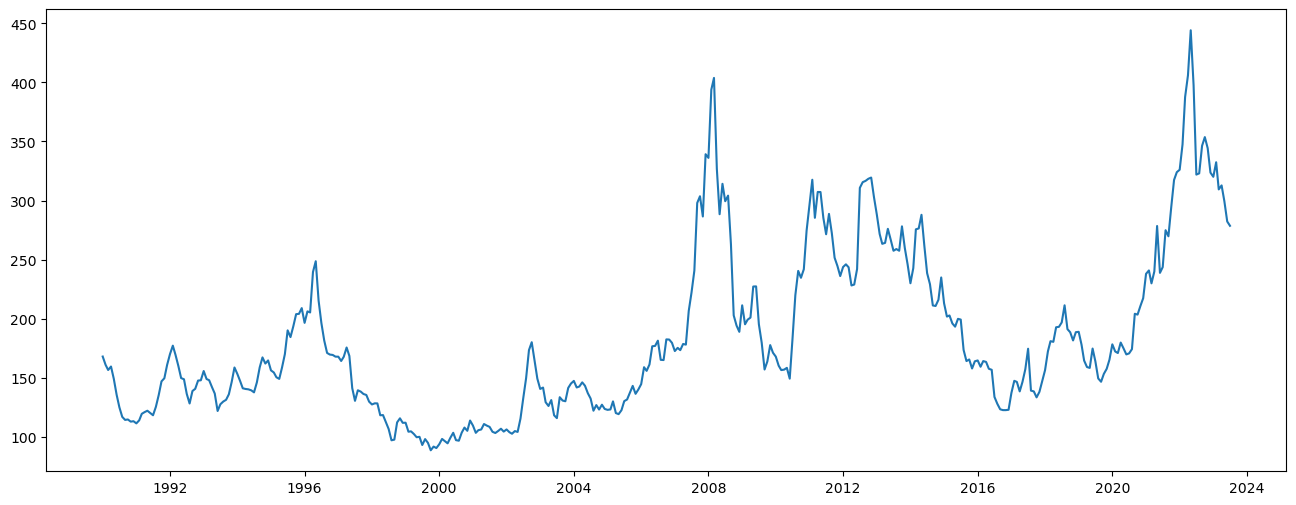

In [72]:
import matplotlib.pyplot as plt

# Plotting the time series.
plt.figure(figsize=(16,6))
plt.plot(df['value'])
plt.show()

In [101]:
import pandas_ta as ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='value', length=10, append=True)
#ta.macd(close='value', length=10, append=True)

date
2020-03-01           NaN
2020-02-01           NaN
2020-01-01           NaN
2019-12-01           NaN
2019-11-01           NaN
                 ...    
1990-05-01    127.222602
1990-04-01    133.085316
1990-03-01    137.347628
1990-02-01    141.636654
1990-01-01    146.415186
Name: EMA_10, Length: 363, dtype: float64

In [102]:
# Drop the first n-rows
df = df.iloc[10:]

# View our newly-formed dataset
print(df.head(10))

                 value  BBL_15_2.0  BBM_15_2.0  BBU_15_2.0  BBB_15_2.0  \
date                                                                     
2019-05-01  158.281695  145.381677  165.675952  185.970226   24.498757   
2019-04-01  159.030089  144.538027  164.906349  185.274672   24.702896   
2019-03-01  164.506645  144.353624  164.558637  184.763649   24.556612   
2019-02-01  177.916702  144.095792  164.756086  185.416379   25.079854   
2019-01-01  188.844950  142.554927  165.362648  188.170368   27.585094   
2018-12-01  188.535836  141.049979  166.540053  192.030128   30.611344   
2018-11-01  181.552391  140.710363  167.161472  193.612582   31.647375   
2018-10-01  188.461607  139.806204  167.842794  195.879385   33.408155   
2018-09-01  191.144422  139.284479  169.568780  199.853081   35.719195   
2018-08-01  211.292059  137.218181  173.153033  209.087884   41.506465   

            BBP_15_2.0      EMA_10  
date                                
2019-05-01    0.317824  162.294278  


In [103]:
df.isnull().sum()

value         0
BBL_15_2.0    0
BBM_15_2.0    0
BBU_15_2.0    0
BBB_15_2.0    0
BBP_15_2.0    0
EMA_10        0
dtype: int64

In [104]:
MyStrategy = ta.Strategy(
    name="strategy_3",
    ta=[{
        "close": 'value', 
        "kind": "bbands", 
        "length": 15,
        "std": 2
    }]
)

In [105]:
df.ta.strategy(MyStrategy)

C:\Users\thong.lam\AppData\Local\Temp\ipykernel_14852\528883590.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
df

,date,value,BBL_15_2.0,BBM_15_2.0,BBU_15_2.0,BBB_15_2.0,BBP_15_2.0
date,,,,,,,
2022-09-01,2022-09-01,346.322181,NaN,NaN,NaN,NaN,NaN
2022-08-01,2022-08-01,323.016769,NaN,NaN,NaN,NaN,NaN
2022-07-01,2022-07-01,321.975128,NaN,NaN,NaN,NaN,NaN
2022-06-01,2022-06-01,397.652320,NaN,NaN,NaN,NaN,NaN
2022-05-01,2022-05-01,444.156568,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1990-05-01,1990-05-01,149.179291,101.130130,120.490919,139.851709,32.136512,1.240888
1990-04-01,1990-04-01,159.467529,95.886298,123.241449,150.596600,44.392778,1.162144
1990-03-01,1990-03-01,156.528030,93.765115,125.666531,157.567947,50.771539,0.983701


In [83]:
from scipy.stats import skewnorm
import plotly.graph_objects as go
import plotly.express as px

In [90]:
def graph_stock(df_original):
  #time_column is a string
  df = df_original.copy()
  pd.options.plotting.backend = "plotly"

  #i need to create a column with the index, otherwise plotly won't graph it
  df['date'] = df.index

  fig = px.line(df, x='date', y=df.columns[~df.columns.isin(['BBB_15_2.0','BBP_15_2.0'])])

  fig.show()

In [106]:
graph_stock(df)

In [107]:
df

,value,BBL_15_2.0,BBM_15_2.0,BBU_15_2.0,BBB_15_2.0,BBP_15_2.0,EMA_10
date,,,,,,,
2019-05-01,158.281695,NaN,NaN,NaN,NaN,NaN,162.294278
2019-04-01,159.030089,NaN,NaN,NaN,NaN,NaN,161.700789
2019-03-01,164.506645,NaN,NaN,NaN,NaN,NaN,162.210945
2019-02-01,177.916702,NaN,NaN,NaN,NaN,NaN,165.066537
2019-01-01,188.844950,NaN,NaN,NaN,NaN,NaN,169.389885
...,...,...,...,...,...,...,...
1990-05-01,149.179291,101.130130,120.490919,139.851709,32.136512,1.240888,127.222602
1990-04-01,159.467529,95.886298,123.241449,150.596600,44.392778,1.162144,133.085316
1990-03-01,156.528030,93.765115,125.666531,157.567947,50.771539,0.983701,137.347628
